In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split

# Load Data
Load data using pandas dataframe

In [2]:
train_dir = "/kaggle/input/blood-vessel-segmentation/train/"
images = []
labels = []

for root, dirs, files in os.walk(train_dir):
    for file in files:
        if file.endswith(".tif") and "kidney_3_dense" not in root:
            if "images" in root:
                images.append(os.path.join(root, file))
            elif "labels" in root:
                labels.append(os.path.join(root, file))
images.sort()
labels.sort()

print("Images:")
print(len(images))

print("\nLabels:")
print(len(labels))


Images:
6928

Labels:
6928


In [3]:
print(images[6000])
print(labels[6000])

/kaggle/input/blood-vessel-segmentation/train/kidney_3_sparse/images/0107.tif
/kaggle/input/blood-vessel-segmentation/train/kidney_3_sparse/labels/0107.tif


In [4]:
type(images)

list

In [5]:
df = pd.DataFrame(list(zip(images, labels)), columns = ["image path", "mask path"])
df.to_csv("path.csv")

In [6]:
df.head()

,image path,mask path
0,/kaggle/input/blood-vessel-segmentation/train/...,/kaggle/input/blood-vessel-segmentation/train/...
1,/kaggle/input/blood-vessel-segmentation/train/...,/kaggle/input/blood-vessel-segmentation/train/...
2,/kaggle/input/blood-vessel-segmentation/train/...,/kaggle/input/blood-vessel-segmentation/train/...
3,/kaggle/input/blood-vessel-segmentation/train/...,/kaggle/input/blood-vessel-segmentation/train/...
4,/kaggle/input/blood-vessel-segmentation/train/...,/kaggle/input/blood-vessel-segmentation/train/...


In [7]:
df_train, df_val = train_test_split(df, test_size=0.2, random_state = 0)
df_train.to_csv("df_train.csv")
df_val.to_csv("df_val.csv")

In [8]:
print("\nTotal images and masks in data train: ",len(df_train),
      "\nTotal images and masks in data valid:",len(df_val))


Total images and masks in data train:  5542 
Total images and masks in data valid: 1386


In [9]:
df_train.head()

,image path,mask path
2240,/kaggle/input/blood-vessel-segmentation/train/...,/kaggle/input/blood-vessel-segmentation/train/...
6476,/kaggle/input/blood-vessel-segmentation/train/...,/kaggle/input/blood-vessel-segmentation/train/...
2812,/kaggle/input/blood-vessel-segmentation/train/...,/kaggle/input/blood-vessel-segmentation/train/...
1106,/kaggle/input/blood-vessel-segmentation/train/...,/kaggle/input/blood-vessel-segmentation/train/...
5646,/kaggle/input/blood-vessel-segmentation/train/...,/kaggle/input/blood-vessel-segmentation/train/...


In [10]:
df_val.head()

,image path,mask path
1043,/kaggle/input/blood-vessel-segmentation/train/...,/kaggle/input/blood-vessel-segmentation/train/...
888,/kaggle/input/blood-vessel-segmentation/train/...,/kaggle/input/blood-vessel-segmentation/train/...
3768,/kaggle/input/blood-vessel-segmentation/train/...,/kaggle/input/blood-vessel-segmentation/train/...
311,/kaggle/input/blood-vessel-segmentation/train/...,/kaggle/input/blood-vessel-segmentation/train/...
4670,/kaggle/input/blood-vessel-segmentation/train/...,/kaggle/input/blood-vessel-segmentation/train/...


# PREPROCESSING IMAGES
make a new images by image processing using cv2

In [11]:
def save_images_resize_CLAHE_512x512(df, output_path, target_size=(512,512)):
    os.makedirs(output_path, exist_ok=True)
    for i, row in df.iterrows():
        image_path = row["image path"]
        if image_path.lower().endswith((".tif")):
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
            clahe_img = clahe.apply(img)
            resize_img = cv2.resize(clahe_img, target_size)
            norm_img = cv2.normalize(resize_img, None, 0, 255, cv2.NORM_MINMAX)
            
            filename = f"images_{i}.tif"
            output_file_path = os.path.join(output_path, filename)
            cv2.imwrite(output_file_path, norm_img)
            
            print(f"Processed: {filename}")


def save_masks_resize_512x512(df, output_path, target_size=(512,512)):
    os.makedirs(output_path, exist_ok=True)
    for i, row in df.iterrows():
        mask_path = row["mask path"]
        if mask_path.lower().endswith((".tif")):
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            resize_mask = cv2.resize(mask, target_size)
            norm_mask = cv2.normalize(resize_mask, None, 0, 1, cv2.NORM_MINMAX)
            
            filename = f"masks_{i}.tif"
            output_file_path = os.path.join(output_path, filename)
            cv2.imwrite(output_file_path, norm_mask)
            
            print(f"Processed: {filename}")
            

In [12]:
output_path_train_images = "/kaggle/working/img_512x512/images"
output_path_train_masks = "/kaggle/working/img_512x512/masks"
output_path_val_images = "/kaggle/working/val_img_512x512/images"
output_path_val_masks = "/kaggle/working/val_img_512x512/masks"

In [13]:
new_train_img = save_images_resize_CLAHE_512x512(df_train, output_path = output_path_train_images,
                                                target_size=(512,512))

Processed: images_2240.tif
Processed: images_6476.tif
Processed: images_2812.tif
Processed: images_1106.tif
Processed: images_5646.tif
Processed: images_1656.tif
Processed: images_1705.tif
Processed: images_4764.tif
Processed: images_4314.tif
Processed: images_2272.tif
Processed: images_6031.tif
Processed: images_1829.tif
Processed: images_6271.tif
Processed: images_6730.tif
Processed: images_2285.tif
Processed: images_2824.tif
Processed: images_2708.tif
Processed: images_1245.tif
Processed: images_465.tif
Processed: images_4111.tif
Processed: images_3520.tif
Processed: images_1108.tif
Processed: images_3788.tif
Processed: images_5482.tif
Processed: images_3363.tif
Processed: images_1854.tif
Processed: images_1171.tif
Processed: images_6285.tif
Processed: images_4141.tif
Processed: images_6113.tif
Processed: images_6448.tif
Processed: images_210.tif
Processed: images_3450.tif
Processed: images_4976.tif
Processed: images_1547.tif
Processed: images_4665.tif
Processed: images_3535.tif
Pro

In [14]:
new_train_mask = save_masks_resize_512x512(df_train, output_path = output_path_train_masks,
                                                target_size=(512,512))

Processed: masks_2240.tif
Processed: masks_6476.tif
Processed: masks_2812.tif
Processed: masks_1106.tif
Processed: masks_5646.tif
Processed: masks_1656.tif
Processed: masks_1705.tif
Processed: masks_4764.tif
Processed: masks_4314.tif
Processed: masks_2272.tif
Processed: masks_6031.tif
Processed: masks_1829.tif
Processed: masks_6271.tif
Processed: masks_6730.tif
Processed: masks_2285.tif
Processed: masks_2824.tif
Processed: masks_2708.tif
Processed: masks_1245.tif
Processed: masks_465.tif
Processed: masks_4111.tif
Processed: masks_3520.tif
Processed: masks_1108.tif
Processed: masks_3788.tif
Processed: masks_5482.tif
Processed: masks_3363.tif
Processed: masks_1854.tif
Processed: masks_1171.tif
Processed: masks_6285.tif
Processed: masks_4141.tif
Processed: masks_6113.tif
Processed: masks_6448.tif
Processed: masks_210.tif
Processed: masks_3450.tif
Processed: masks_4976.tif
Processed: masks_1547.tif
Processed: masks_4665.tif
Processed: masks_3535.tif
Processed: masks_2381.tif
Processed: mas

In [15]:
new_val_img = save_images_resize_CLAHE_512x512(df_val, output_path = output_path_val_images,
                                                target_size=(512,512))

Processed: images_1043.tif
Processed: images_888.tif
Processed: images_3768.tif
Processed: images_311.tif
Processed: images_4670.tif
Processed: images_5523.tif
Processed: images_5424.tif
Processed: images_3321.tif
Processed: images_4654.tif
Processed: images_4511.tif
Processed: images_731.tif
Processed: images_641.tif
Processed: images_6682.tif
Processed: images_2407.tif
Processed: images_134.tif
Processed: images_4933.tif
Processed: images_5324.tif
Processed: images_1751.tif
Processed: images_6075.tif
Processed: images_4179.tif
Processed: images_202.tif
Processed: images_1632.tif
Processed: images_3566.tif
Processed: images_2764.tif
Processed: images_4013.tif
Processed: images_6742.tif
Processed: images_4970.tif
Processed: images_5931.tif
Processed: images_3046.tif
Processed: images_2453.tif
Processed: images_38.tif
Processed: images_3054.tif
Processed: images_5914.tif
Processed: images_5255.tif
Processed: images_6599.tif
Processed: images_1906.tif
Processed: images_3906.tif
Processed

In [16]:
new_val_mask = save_masks_resize_512x512(df_val, output_path = output_path_val_masks,
                                                target_size=(512,512))

Processed: masks_1043.tif
Processed: masks_888.tif
Processed: masks_3768.tif
Processed: masks_311.tif
Processed: masks_4670.tif
Processed: masks_5523.tif
Processed: masks_5424.tif
Processed: masks_3321.tif
Processed: masks_4654.tif
Processed: masks_4511.tif
Processed: masks_731.tif
Processed: masks_641.tif
Processed: masks_6682.tif
Processed: masks_2407.tif
Processed: masks_134.tif
Processed: masks_4933.tif
Processed: masks_5324.tif
Processed: masks_1751.tif
Processed: masks_6075.tif
Processed: masks_4179.tif
Processed: masks_202.tif
Processed: masks_1632.tif
Processed: masks_3566.tif
Processed: masks_2764.tif
Processed: masks_4013.tif
Processed: masks_6742.tif
Processed: masks_4970.tif
Processed: masks_5931.tif
Processed: masks_3046.tif
Processed: masks_2453.tif
Processed: masks_38.tif
Processed: masks_3054.tif
Processed: masks_5914.tif
Processed: masks_5255.tif
Processed: masks_6599.tif
Processed: masks_1906.tif
Processed: masks_3906.tif
Processed: masks_3066.tif
Processed: masks_460

In [17]:
#see total images equal to total images in df
print("\nTotal images in df train: ",len(df_train),
      "\nTotal new images:",len(os.listdir(output_path_train_images)))
print("\nTotal masks in df train: ",len(df_train),
      "\nTotal new masks:",len(os.listdir(output_path_train_masks)))
print("\nTotal images in df val: ",len(df_val),
      "\nTotal new images:",len(os.listdir(output_path_val_images)))
print("\nTotal masks in df val: ",len(df_val),
      "\nTotal new masks:",len(os.listdir(output_path_val_masks)))


Total images in df train:  5542 
Total new images: 5542

Total masks in df train:  5542 
Total new masks: 5542

Total images in df val:  1386 
Total new images: 1386

Total masks in df val:  1386 
Total new masks: 1386


# Let's see the image and mask

images shape: (512, 512)
max_value: 0 min_value: 255 
dtype: uint8


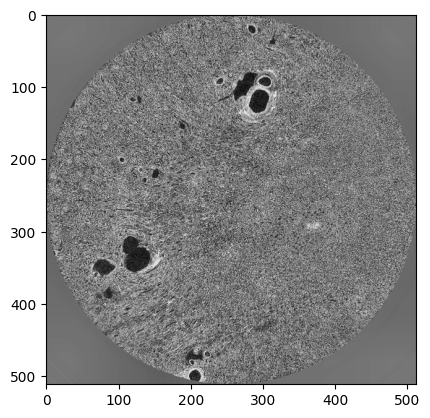

In [18]:
x = "/kaggle/working/img_512x512/images/images_2812.tif"
img = cv2.imread(x, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
print("images shape:", img.shape)
print("max_value:",img.min(),
      "min_value:",img.max(),
      "\ndtype:",img.dtype)

masks shape: (512, 512)
max_value: 0 min_value: 1 
dtype: uint8


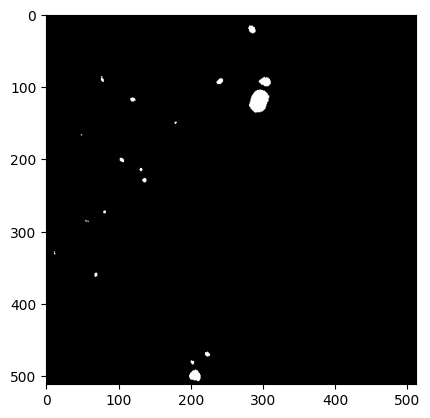

In [19]:
y = "/kaggle/working/img_512x512/masks/masks_2812.tif"
msk = cv2.imread(y, cv2.IMREAD_GRAYSCALE)
plt.imshow(msk, cmap="gray")
print("masks shape:", msk.shape)
print("max_value:",msk.min(),
      "min_value:",msk.max(),
      "\ndtype:",msk.dtype)

In [20]:
# #downlaod new train img_mask and val img_mask
# !zip -r blood_vessel_segmentation_512x512.zip /kaggle/working